<a href="https://colab.research.google.com/github/msammons82/ExxonStockAnalysis/blob/main/ExxonStockEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import yfinance as yf

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 17.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
df = yf.download('XOM', start='2000-01-01', end ='2022-04-10')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,39.750000,40.375000,38.937500,39.156250,19.671473,13458200
2000-01-04,38.687500,39.093750,38.250000,38.406250,19.294691,14510800
2000-01-05,39.000000,40.875000,38.906250,40.500000,20.346552,17485000
2000-01-06,40.312500,42.906250,40.093750,42.593750,21.398417,19461600
2000-01-07,42.968750,43.125000,42.000000,42.468750,21.335621,16603800
...,...,...,...,...,...,...
2022-04-04,83.559998,83.660004,82.050003,83.160004,83.160004,20869400
2022-04-05,83.500000,85.070000,82.559998,82.730003,82.730003,21753100
2022-04-06,83.419998,84.699997,82.940002,83.650002,83.650002,24768200


In [4]:
df['MA200'] = df['Adj Close'].rolling(window = 200).mean()

In [5]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,MA200
Date,,,,,,,
2000-10-16,45.250000,45.250000,43.718750,43.906250,22.423550,13969400,20.617982
2000-10-17,44.437500,44.875000,43.656250,43.906250,22.423550,12933000,20.631743
2000-10-18,44.500000,44.843750,43.218750,43.281250,22.104351,12507200,20.645791
2000-10-19,43.187500,44.093750,42.906250,43.250000,22.088400,12546200,20.654500
2000-10-20,43.156250,44.218750,43.156250,44.218750,22.583153,10662800,20.660424
...,...,...,...,...,...,...,...
2022-04-04,83.559998,83.660004,82.050003,83.160004,83.160004,20869400,64.605951
2022-04-05,83.500000,85.070000,82.559998,82.730003,82.730003,21753100,64.718740
2022-04-06,83.419998,84.699997,82.940002,83.650002,83.650002,24768200,64.830362


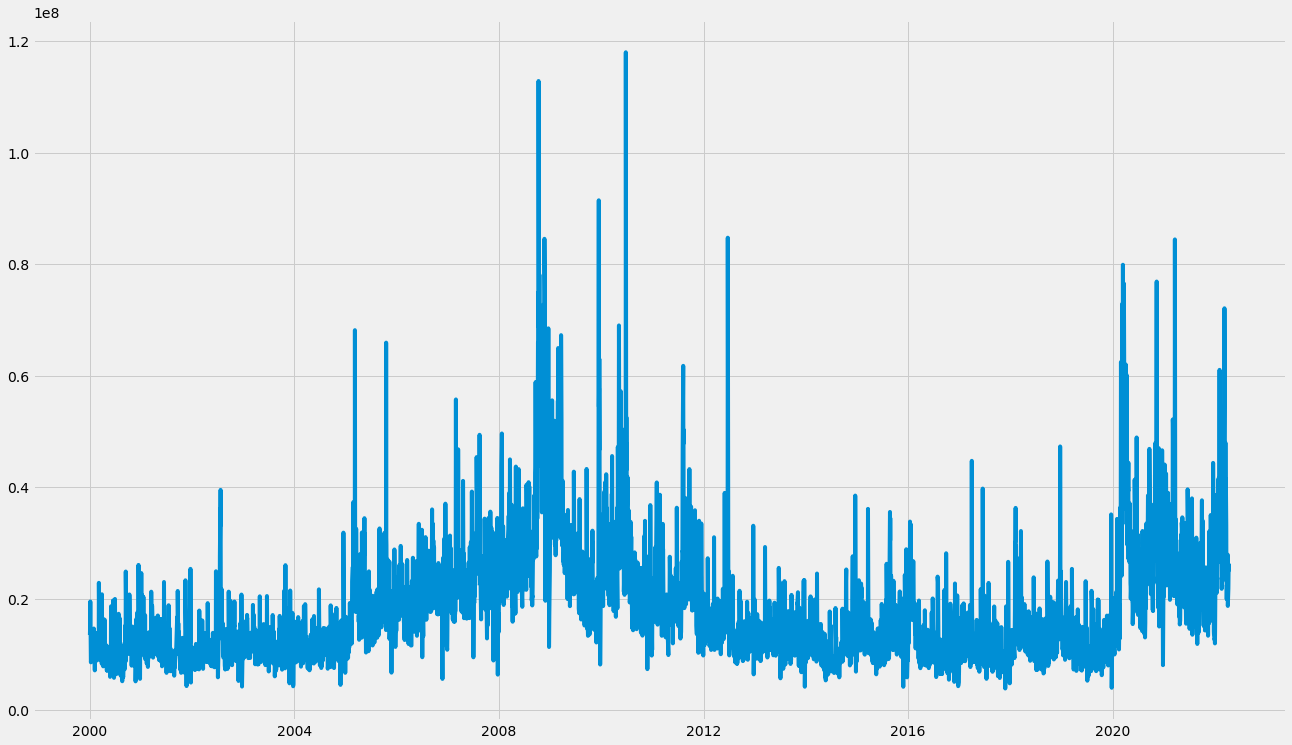

In [6]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20,12))
plt.plot(df['Volume'])

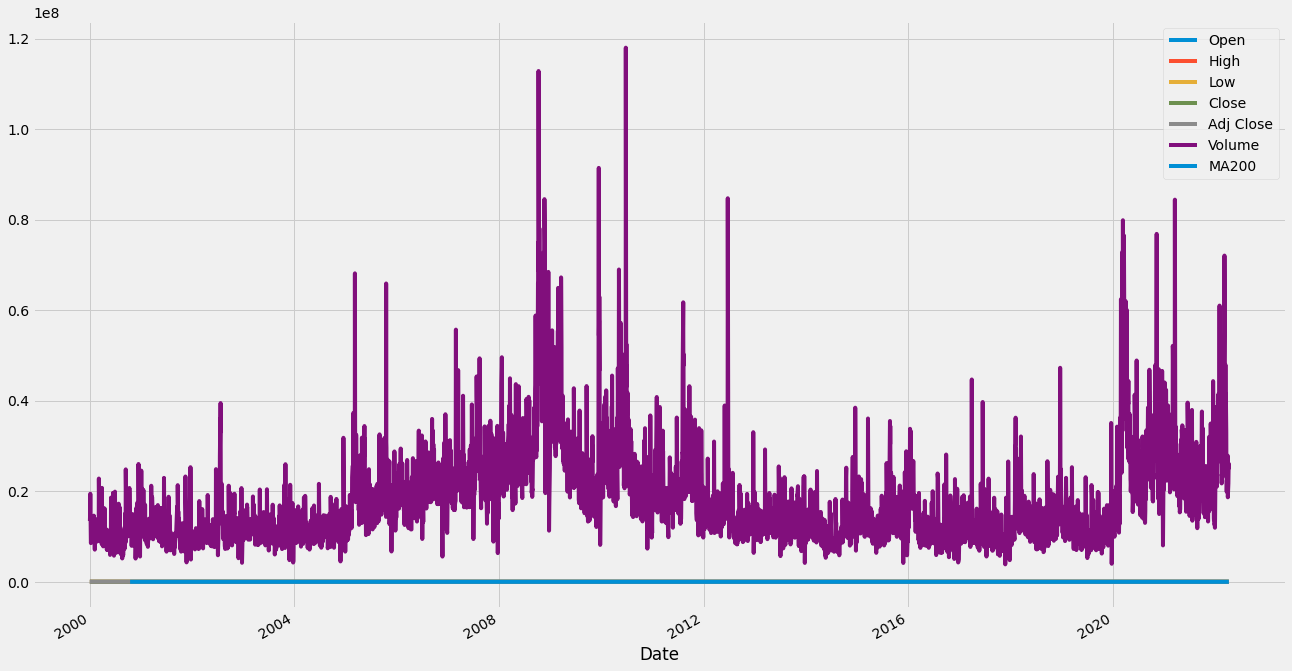

In [7]:
df.plot(figsize = (20,12))

Text(0.5, 1.0, 'Exxon Stock at all time')

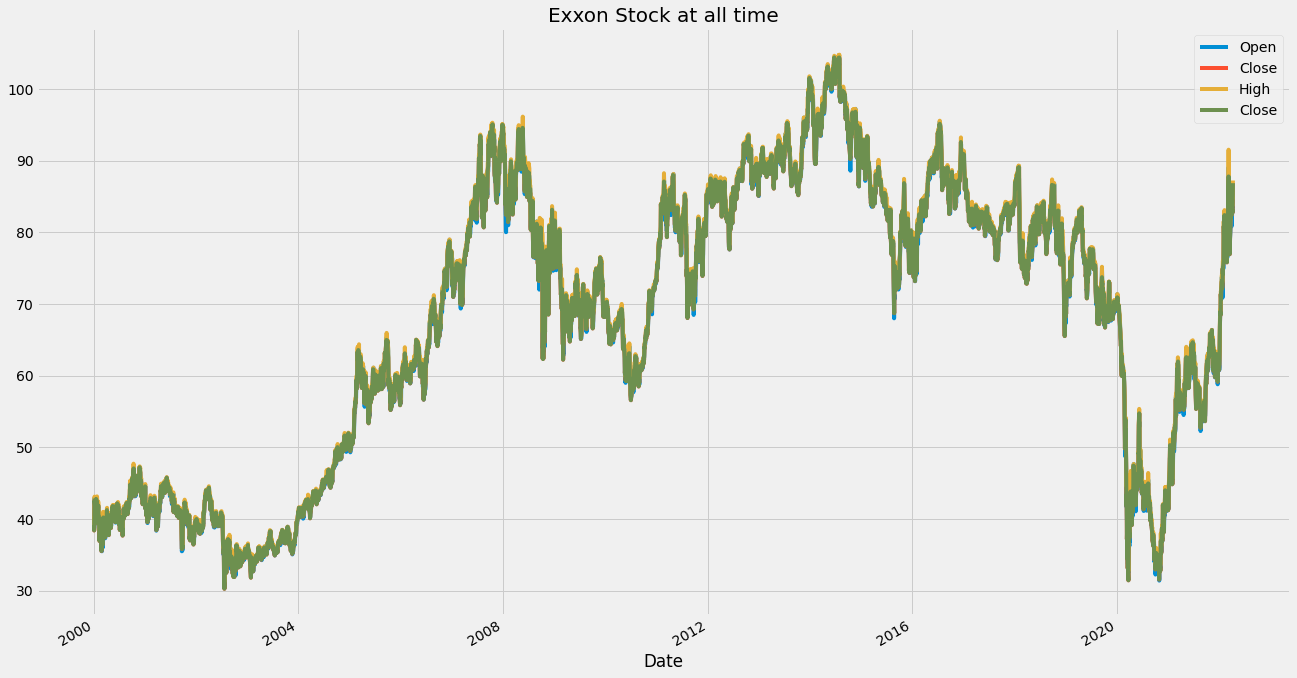

In [8]:
df[['Open', 'Close','High','Close']].plot(figsize =(20,12))
plt.title('Exxon Stock at all time', fontsize = 20)

Text(0, 0.5, 'Stock Movement')

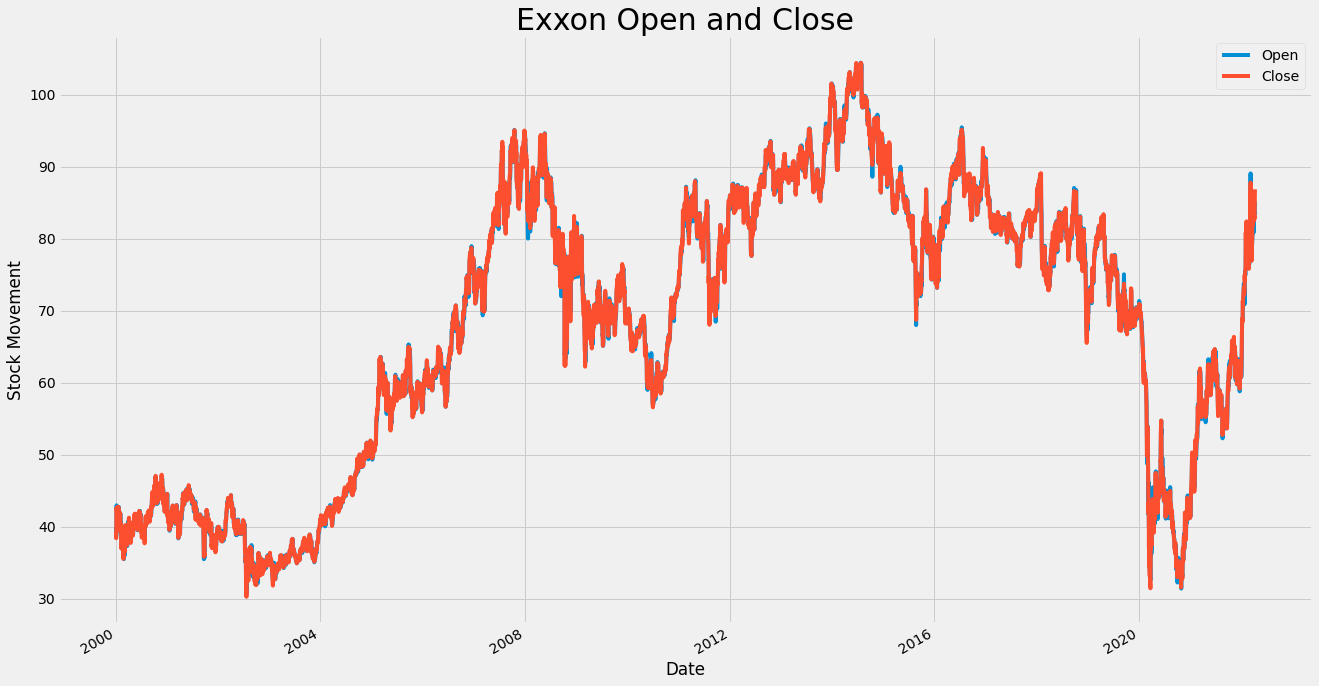

In [10]:
df[['Open','Close']].plot(figsize = (20,12))
plt.title('Exxon Open and Close', fontsize = 30)
plt.xlabel('Date')
plt.ylabel('Stock Movement')

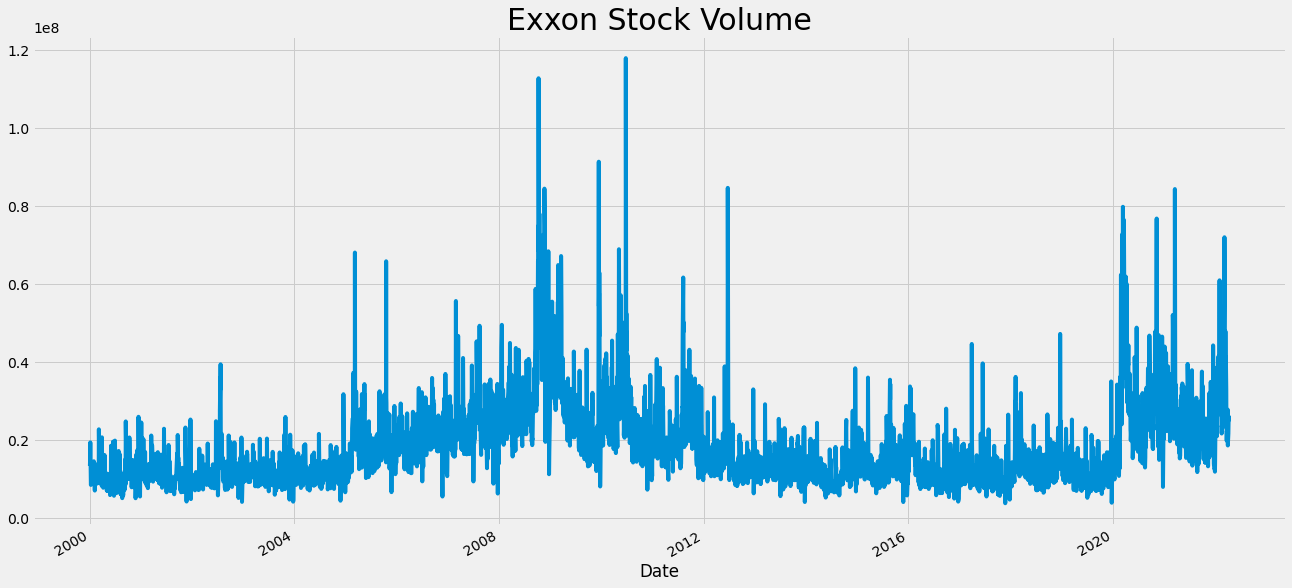

In [11]:
df['Volume'].plot(figsize=(20,10))
plt.title('Exxon Stock Volume',fontsize = 30)
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
print(adf_test(df['High']))

Results of Dickey-Fuller Test:
Test Statistic                   -1.838916
p-value                           0.361319
#Lags Used                        4.000000
Number of Observations Used    5599.000000
Critical Value (1%)              -3.431518
Critical Value (5%)              -2.862056
Critical Value (10%)             -2.567045
dtype: float64
None


In [14]:
print(adf_test(df['High'].resample('MS').mean()))

Results of Dickey-Fuller Test:
Test Statistic                  -1.909514
p-value                          0.327599
#Lags Used                       1.000000
Number of Observations Used    266.000000
Critical Value (1%)             -3.455175
Critical Value (5%)             -2.872468
Critical Value (10%)            -2.572593
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                -1.145020e+01
p-value                        5.883565e-21
#Lags Used                     1.000000e+00
Number of Observations Used    2.650000e+02
Critical Value (1%)           -3.455270e+00
Critical Value (5%)           -2.872509e+00
Critical Value (10%)          -2.572615e+00
dtype: float64
None


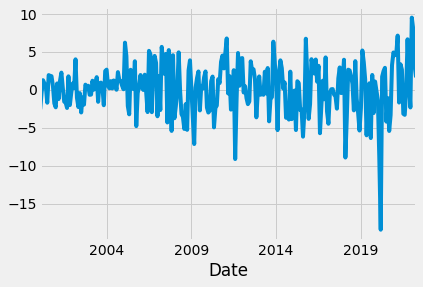

In [16]:
ex_diff = df['Open'].resample('MS').mean() - df['Open'].resample('MS').mean().shift(1)
ex_open_diff = ex_diff.dropna()
ex_open_diff.plot()

print(adf_test(ex_open_diff))

# KPSS

In [17]:
from statsmodels.tsa.stattools import kpss

In [18]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", lags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [19]:
kpss_test(df['High'])

Results of KPSS Test:
Test Statistic            5.24694
p-value                   0.01000
Lags Used                44.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


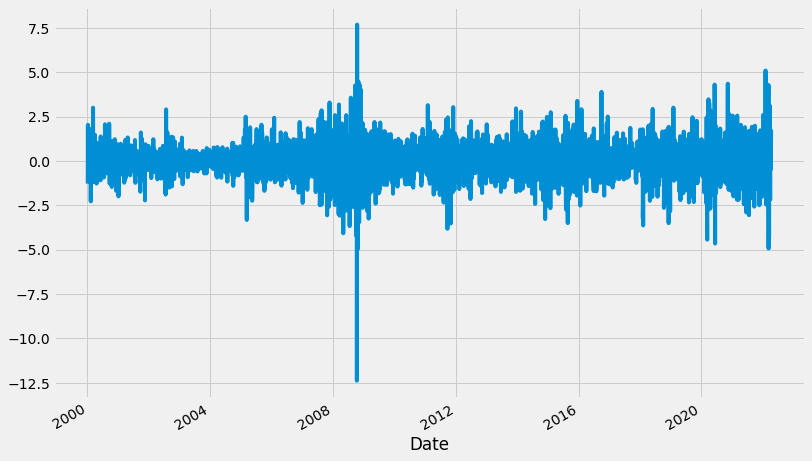

In [20]:
df['High_diff'] = df['High'] - df['High'].shift(1)
df['High_diff'].dropna().plot(figsize = (12,8))

In [21]:
kpss_test(df['High_diff'].dropna())

Results of KPSS Test:
Test Statistic           0.071236
p-value                  0.100000
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [22]:
kpss_test(df['High_diff'].resample('MS').mean().dropna())

Results of KPSS Test:
Test Statistic           0.081759
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [23]:
kpss_test(df['High_diff'].resample('MS').std().dropna())

Results of KPSS Test:
Test Statistic           0.686039
p-value                  0.014815
Lags Used                9.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [25]:
adf_test(df['High_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -36.928941
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5599.000000
Critical Value (1%)              -3.431518
Critical Value (5%)              -2.862056
Critical Value (10%)             -2.567045
dtype: float64


# Data Preprocessing

In [26]:
train_df = df['High'].iloc[:-4]

X_train = []
y_train = []

for i in range(2, len(train_df)):
  X_train.append(train_df[i-2:i])
  y_train.append(train_df[i])

In [27]:
import math
train_len = math.ceil(len(train_df)*0.8)
train_len

4480

# For Model and apply RNN + LSTM

In [28]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout, TimeDistributed
from tensorflow.keras.models import Sequential

In [29]:
X_train, y_train= np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [30]:
model=Sequential()
model.add(LSTM(50,activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
56/56 - 2s - loss: 2617.3147 - 2s/epoch - 33ms/step
Epoch 2/10
56/56 - 0s - loss: 7.1254 - 183ms/epoch - 3ms/step
Epoch 3/10
56/56 - 0s - loss: 1.3629 - 168ms/epoch - 3ms/step
Epoch 4/10
56/56 - 0s - loss: 1.1174 - 179ms/epoch - 3ms/step
Epoch 5/10
56/56 - 0s - loss: 1.1054 - 157ms/epoch - 3ms/step
Epoch

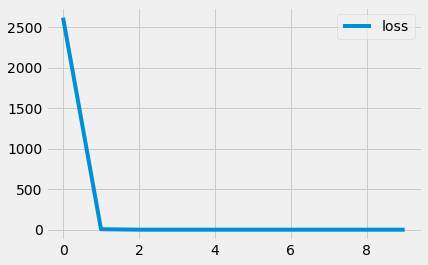

In [31]:
losse = pd.DataFrame(model.history.history)
losse[['loss']].plot()

In [32]:
test_data = train_df[train_len-2:]
X_val=[]
Y_val=[] 

for i in range(2, len(test_data)):
    X_val.append(test_data[i-2:i])
    Y_val.append(test_data[i])

In [33]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
prediction = model.predict(X_val)

In [34]:
from sklearn.metrics import mean_squared_error
# Know the model error accuracy | the model accuracy 
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 1.0395314623888527
Validation rmse: 1.2721216183646733


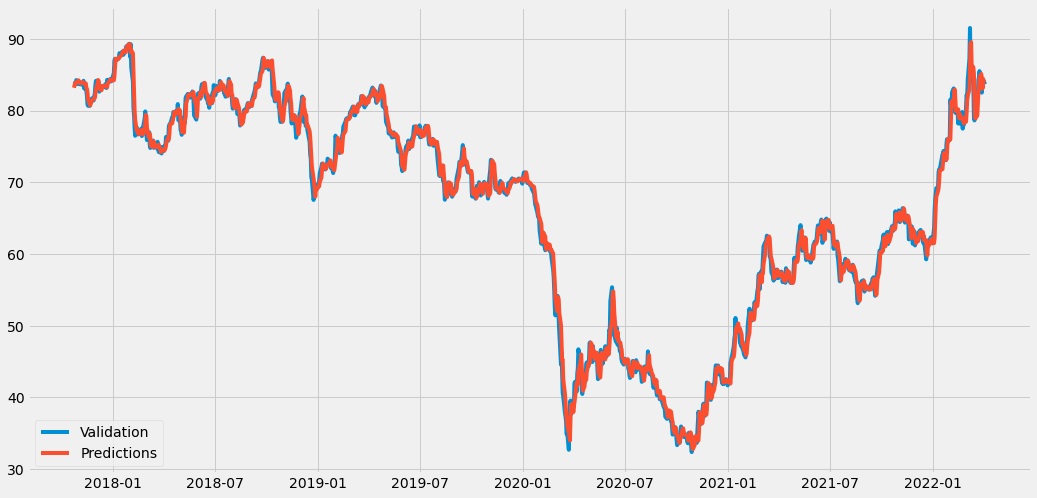

In [35]:
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred 
plt.figure(figsize=(16,8))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [36]:
variance = []
for i in range(len(valid)):
  
  variance.append(valid['High'][i]-valid['Predictions'][i])
variance = pd.DataFrame(variance)
variance.describe()

,0
count,1120.000000
mean,-0.029528
std,1.272347
min,-5.964996
25%,-0.747522
50%,-0.018009
75%,0.668808
max,5.835457


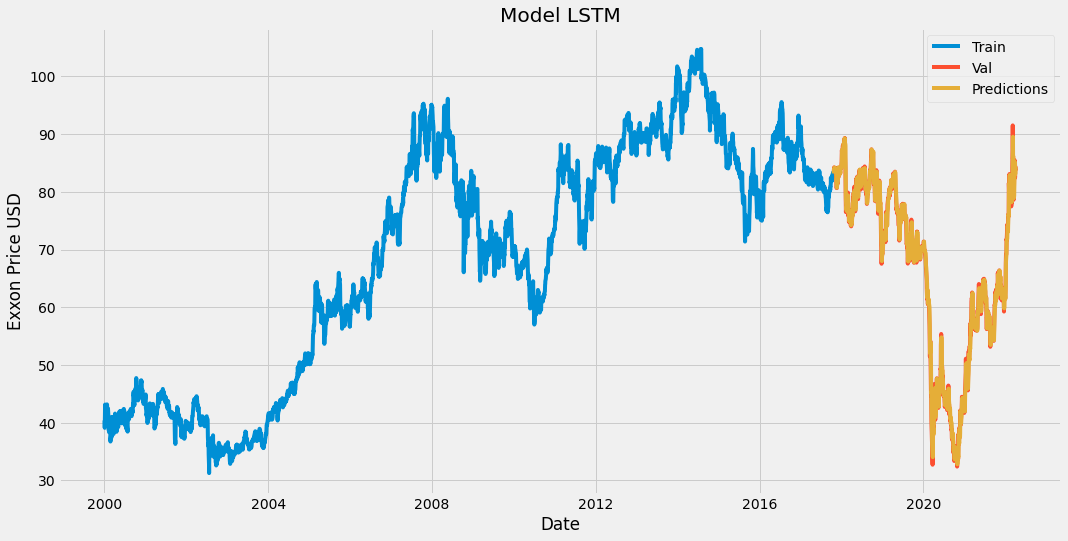

In [38]:
train = train_df[:train_len]
valid = pd.DataFrame(train_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Exxon Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()